<a href="https://colab.research.google.com/github/Damanger/COLAB_CF/blob/main/Transformada_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
'''
  Investigar y enlistar las propiedades que cumple la transformada de Fourier
  discreta directa e inversa en 2D.
  Traslación, rotación, periocidad, propiedades de simetría, etc
'''

'\n  Investigar y enlistar las propiedades que cumple la transformada de Fourier \n  discreta directa e inversa en 2D.\n  Traslación, rotación, periocidad, propiedades de simetría, etc\n'

In [28]:
'''
  Investigar y resumir el teorema de la Convolución 2D para dos funciones en el dominio espacial y de frecuencia
'''

'\n  Investigar y resumir el teorema de la Convolución 2D para dos funciones en el dominio espacial y de frecuencia\n'

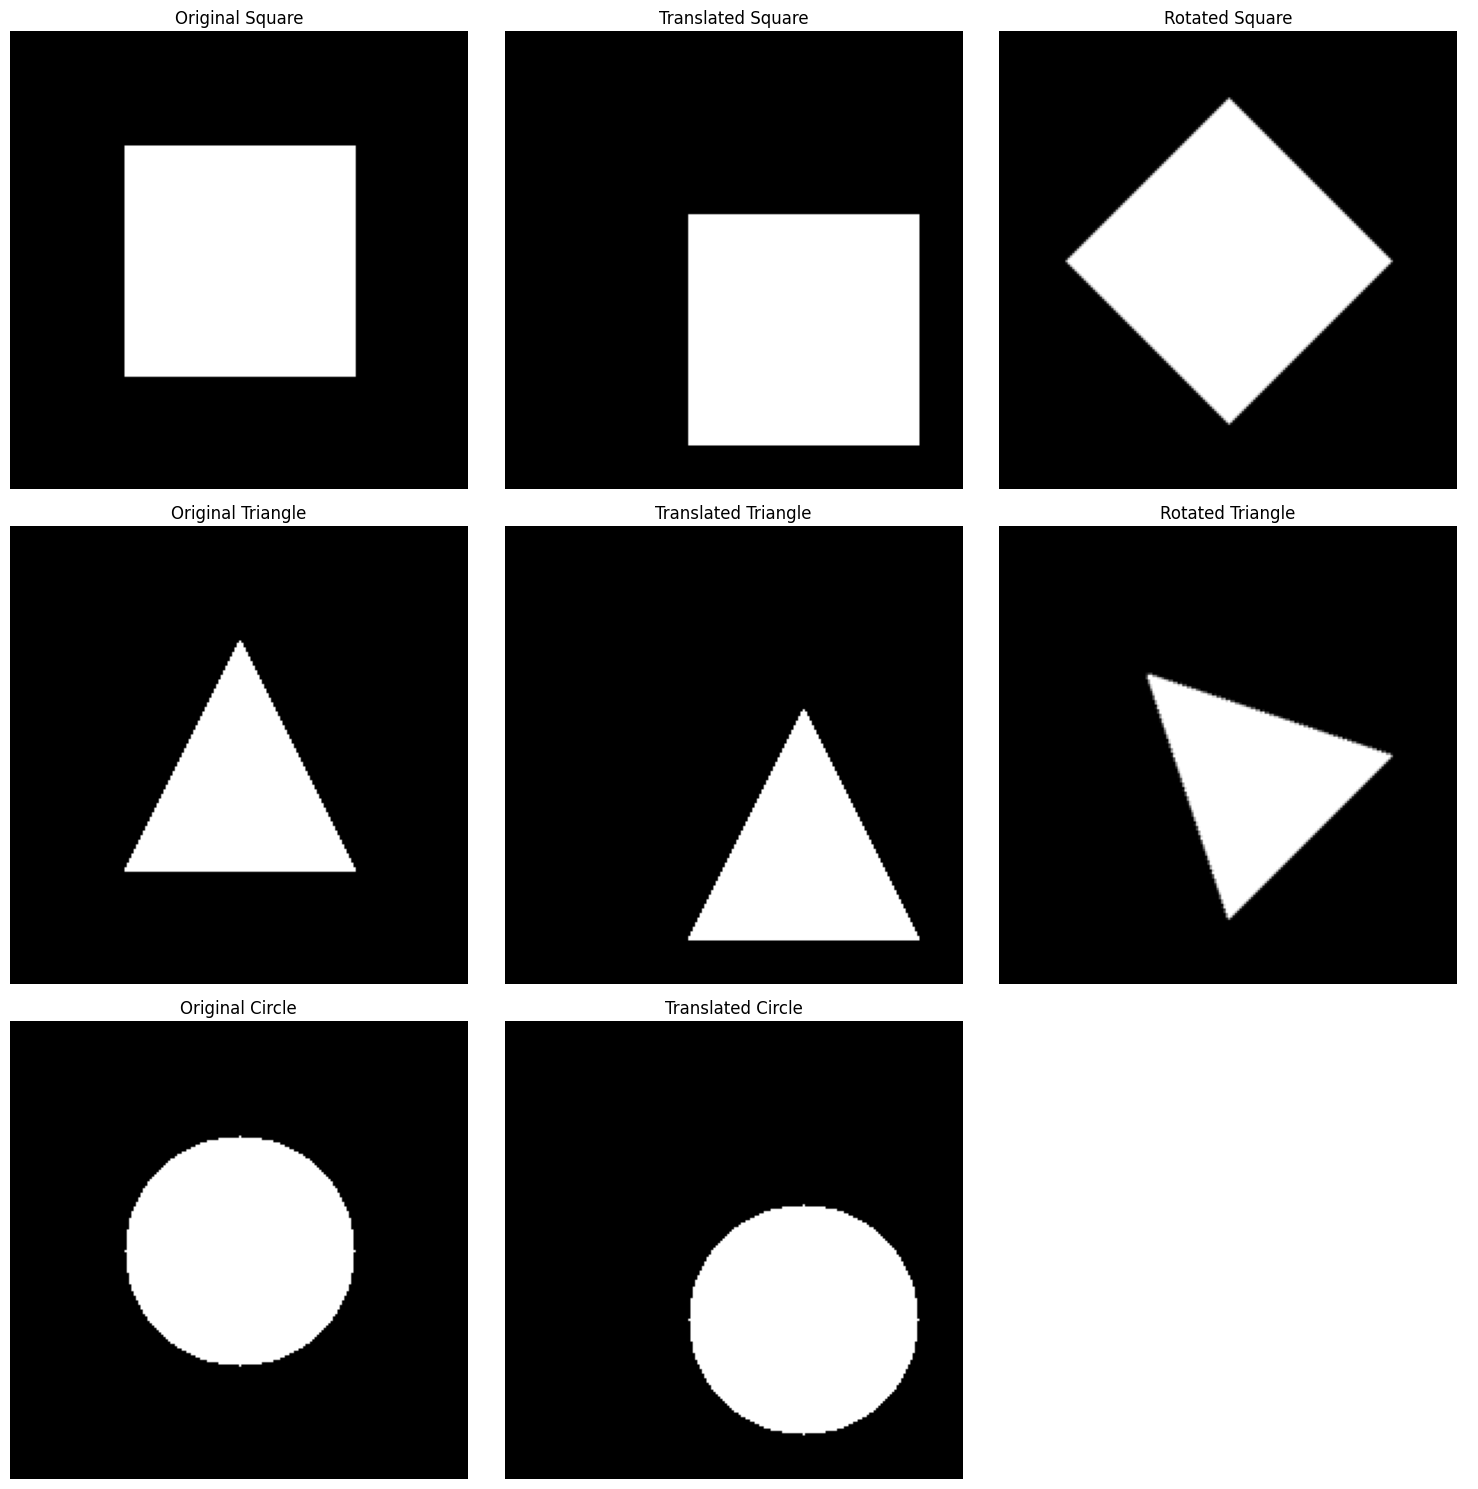

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Size of the binary images
img_size = 200

# Create binary images
square = np.zeros((img_size, img_size))
circle = np.zeros((img_size, img_size))
triangle = np.zeros((img_size, img_size))

# Create the square and circle
cv2.rectangle(square, (50, 50), (150, 150), 255, -1)
cv2.circle(circle, (100, 100), 50, 255, -1)

# Create the triangle
pts = np.array([[150, 150], [100, 50], [50, 150]], np.int32)
cv2.fillPoly(triangle, [pts], 255)

# Function to apply translation
def translate(image, tx, ty):
    rows, cols = image.shape
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (cols, rows))

# Function to apply rotation
def rotate(image, angle, center=None, scale=1.0):
    rows, cols = image.shape
    if center is None:
        center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, M, (cols, rows))

# Apply translation and rotation
square_translated = translate(square, 30, 30)
circle_translated = translate(circle, 30, 30)
triangle_translated = translate(triangle, 30, 30)

square_rotated = rotate(square, 45)
triangle_rotated = rotate(triangle, 45)

# Display the figures
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Square
ax[0, 0].imshow(square, cmap='gray')
ax[0, 0].set_title('Original Square')
ax[0, 1].imshow(square_translated, cmap='gray')
ax[0, 1].set_title('Translated Square')
ax[0, 2].imshow(square_rotated, cmap='gray')
ax[0, 2].set_title('Rotated Square')

# Triangle
ax[1, 0].imshow(triangle, cmap='gray')
ax[1, 0].set_title('Original Triangle')
ax[1, 1].imshow(triangle_translated, cmap='gray')
ax[1, 1].set_title('Translated Triangle')
ax[1, 2].imshow(triangle_rotated, cmap='gray')
ax[1, 2].set_title('Rotated Triangle')

# Circle
ax[2, 0].imshow(circle, cmap='gray')
ax[2, 0].set_title('Original Circle')
ax[2, 1].imshow(circle_translated, cmap='gray')
ax[2, 1].set_title('Translated Circle')

# Adjust visualization
for a in ax.ravel():
    a.axis('off')

plt.tight_layout()
plt.show()

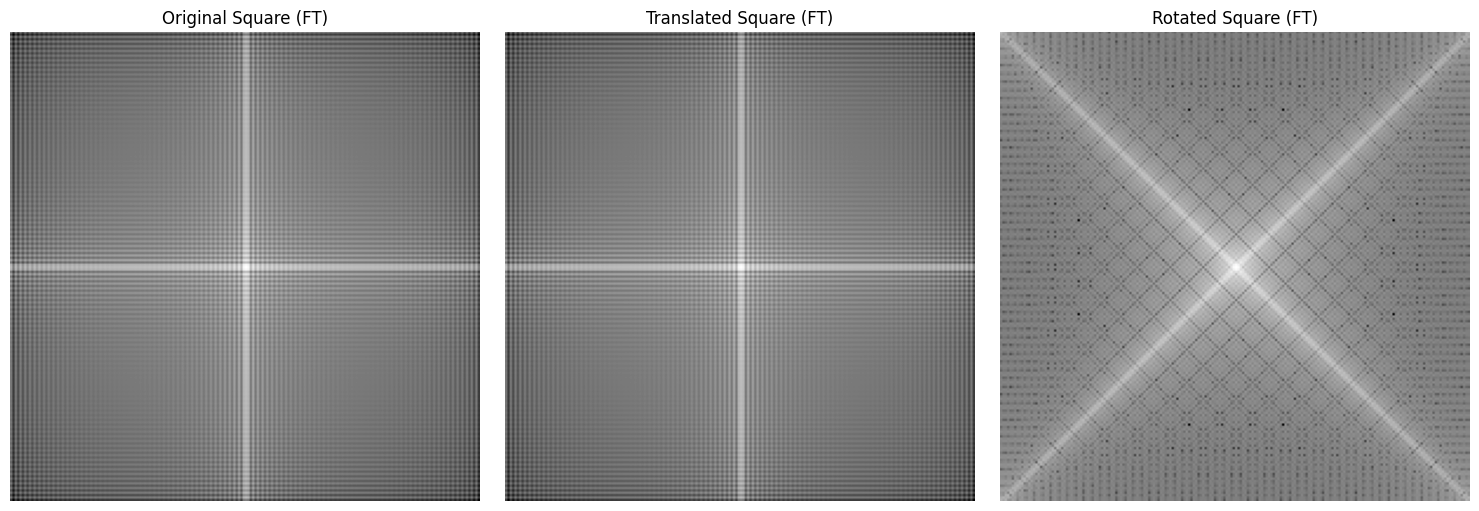

In [35]:
# Fourier Transforms
TFsquare = np.fft.fft2(square)
TFsquare = np.fft.fftshift(TFsquare)

FTsquare_translated = np.fft.fft2(square_translated)
FTsquare_translated = np.fft.fftshift(FTsquare_translated)

FTsquare_rotated = np.fft.fft2(square_rotated)
FTsquare_rotated = np.fft.fftshift(FTsquare_rotated)

#Plot all Fourier Transforms
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(np.log(np.abs(TFsquare)), cmap='gray')
ax[0].set_title("Original Square (FT)")
ax[0].axis('off')

ax[1].imshow(np.log(np.abs(FTsquare_translated)), cmap='gray')
ax[1].set_title("Translated Square (FT)")
ax[1].axis('off')

ax[2].imshow(np.log(np.abs(FTsquare_rotated)), cmap='gray')
ax[2].set_title("Rotated Square (FT)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

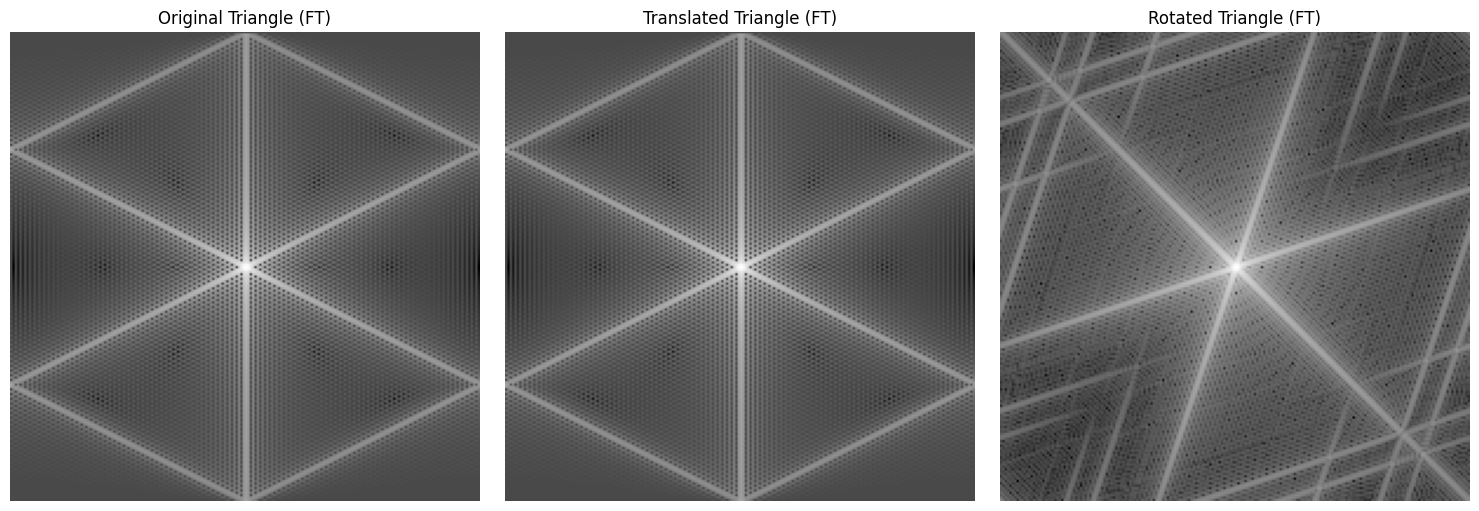

In [37]:
# Fourier Transforms
TFtriangle = np.fft.fft2(triangle)
TFtriangle = np.fft.fftshift(TFtriangle)

FTtriangle_translated = np.fft.fft2(triangle_translated)
FTtriangle_translated = np.fft.fftshift(FTtriangle_translated)

FTtriangle_rotated = np.fft.fft2(triangle_rotated)
FTtriangle_rotated = np.fft.fftshift(FTtriangle_rotated)

# Plot all Fourier Transforms
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(np.log(np.abs(TFtriangle)), cmap='gray')
ax[0].set_title("Original Triangle (FT)")
ax[0].axis('off')

ax[1].imshow(np.log(np.abs(FTtriangle_translated)), cmap='gray')
ax[1].set_title("Translated Triangle (FT)")
ax[1].axis('off')

ax[2].imshow(np.log(np.abs(FTtriangle_rotated)), cmap='gray')
ax[2].set_title("Rotated Triangle (FT)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

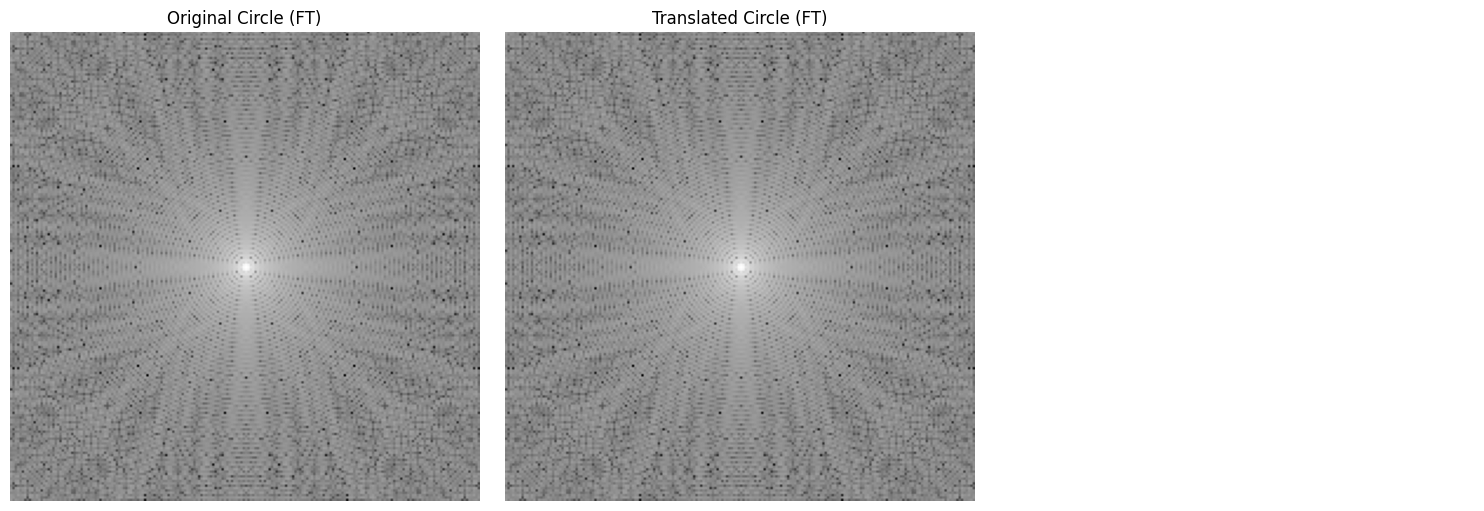

In [41]:
#Fourier Transforms
TFcircle = np.fft.fft2(circle)
TFcircle = np.fft.fftshift(TFcircle)

FTcircle_translated = np.fft.fft2(circle_translated)
FTcircle_translated = np.fft.fftshift(FTcircle_translated)

#Plot all Fourier Transforms
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(np.log(np.abs(TFcircle)), cmap='gray')
ax[0].set_title("Original Circle (FT)")
ax[0].axis('off')

ax[1].imshow(np.log(np.abs(FTcircle_translated)), cmap='gray')
ax[1].set_title("Translated Circle (FT)")
ax[1].axis('off')

ax[2].set_title("")
ax[2].axis('off')

plt.tight_layout()
plt.show()